# BIG DATA ANALYSIS : 주식가격 예측
## 골든 크로스와 데드 크로스

- 골든크로스: 단기 이동평균선이 장기 이동평균선을 관통하여 상승
- 데드크로스: 단기 이동평균선이 장기 이동평균선을 관통하여 하락
- References
    - https://wikidocs.net/4375
---

In [ ]:
import sys
!{sys.executable} -m pip install pandas-datareader

## 1. Pandas를 이용한 이동평균 계산

In [1]:
import pandas as pd

In [2]:
data = [1,2,3,4,5,6,7,8,9,10]
df = pd.DataFrame(data)
window = 2
MA = df[0].rolling(window=window).mean()
print(MA)

0    NaN
1    1.5
2    2.5
3    3.5
4    4.5
5    5.5
6    6.5
7    7.5
8    8.5
9    9.5
Name: 0, dtype: float64


In [3]:
# Q window 값을 바꿔가면서 확인해보세요!

## 2. 삼성전자 주가 데이터 확보

In [24]:
import pandas as pd
import pandas_datareader.data as web
#종목코드, 데이터 요청 서비스, 시작날짜, 종료날짜
gs = web.DataReader("005930.KS", "yahoo", "2018-01-01")

In [25]:
gs.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-03,52560.0,51420.0,52540.0,51620.0,10013500.0,32073.728516
2018-01-04,52180.0,50640.0,52120.0,51080.0,11695450.0,31738.205078
2018-01-05,52120.0,51200.0,51300.0,52120.0,9481150.0,32384.400391
2018-01-08,52520.0,51500.0,52400.0,52020.0,8383650.0,32322.263672
2018-01-09,51720.0,49980.0,51460.0,50400.0,18013600.0,31315.691406


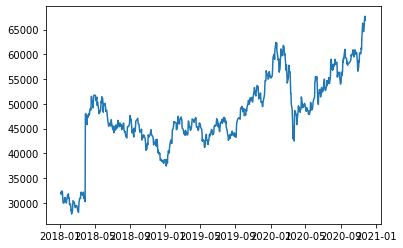

In [26]:
import matplotlib.pyplot as plt
# 조정종가 기준으로 값 확인
plt.plot(gs.index,gs['Adj Close'])

In [27]:
# 5일 이동평균 계산
ma5 = gs['Adj Close'].rolling(window=5).mean()

In [28]:
new_gs = gs[gs['Volume'] !=0]

In [29]:
# 데이터 프레임에 새로운 데이터 삽입
new_gs.insert(len(new_gs.columns), "MA5", ma5)

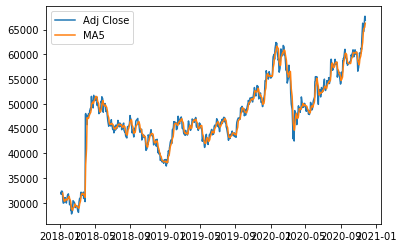

In [30]:
plt.plot(new_gs.index, new_gs['Adj Close'], label='Adj Close')
plt.plot(new_gs.index, new_gs['MA5'], label='MA5')
plt.legend(loc='best')

In [31]:
# Q 300일에 대한 이동평균을 구해보세요!

## 장기 이동평균, 단기 이동평균을 한번에 표현하여, 골든크로스/데드크로스 확인하기

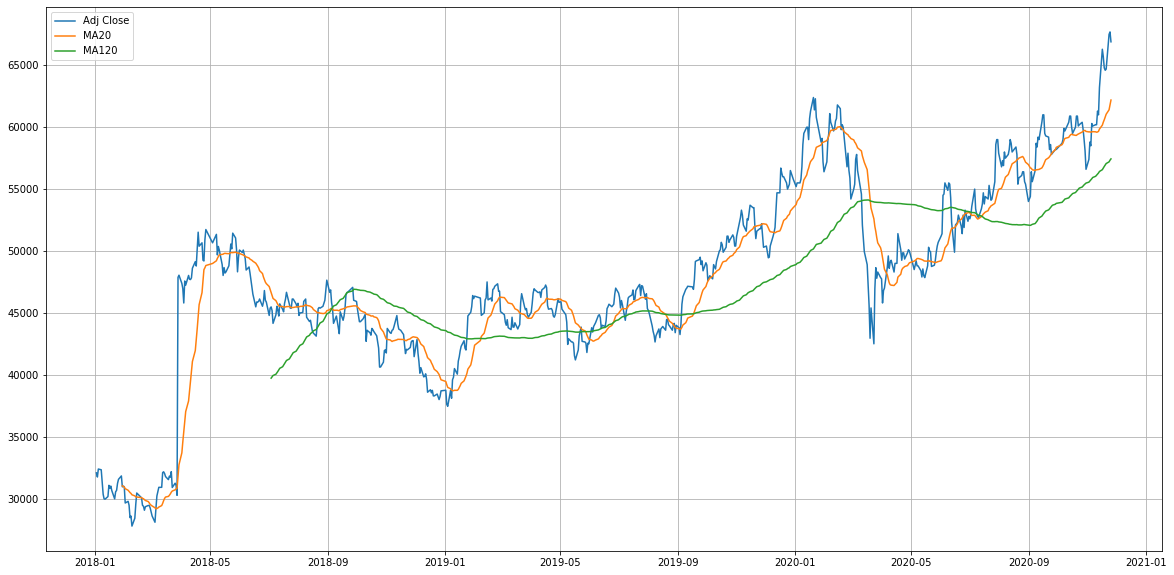

In [33]:
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt

# Get GS Data from Yahoo
gs = web.DataReader("005930.KS", "yahoo", "2018-01-01")
new_gs = gs[gs['Volume']!=0]

# Moving average
ma5 = new_gs['Adj Close'].rolling(window=5).mean()
ma20 = new_gs['Adj Close'].rolling(window=20).mean()
ma60 = new_gs['Adj Close'].rolling(window=60).mean()
ma120 = new_gs['Adj Close'].rolling(window=120).mean()

# Insert columns
new_gs.insert(len(new_gs.columns), "MA5", ma5)
new_gs.insert(len(new_gs.columns), "MA20", ma20)
new_gs.insert(len(new_gs.columns), "MA60", ma60)
new_gs.insert(len(new_gs.columns), "MA120", ma120)


plt.figure(figsize=(20,10))


# Plot
plt.plot(new_gs.index, new_gs['Adj Close'], label='Adj Close')
# plt.plot(new_gs.index, new_gs['MA5'], label='MA5')
plt.plot(new_gs.index, new_gs['MA20'], label='MA20')
# plt.plot(new_gs.index, new_gs['MA60'], label='MA60')
plt.plot(new_gs.index, new_gs['MA120'], label='MA120')

plt.legend(loc="best")
plt.grid()
plt.show()